# Re-thinking Visualization !

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from matplotlib import colors  # colors
import matplotlib.image as image
%config InlineBackend.figure_format = 'retina'   # retina for sharper images

In [28]:
# color setup
title_grey = '#5F5F5F'
text_grey = '#6D6766'
light_grey = '#F0F2F4'
light_grey2 = '#919191'
dark_grey = '#1C2424'

# 

# Visualization 1
### **Story:** Informatively visualize the popularity distribution among age group  of each social media platfrom in the US .
### **Original visualization:**
![viz3](data/viz1.png)

### Changes made:
1. Convert from horizontal marker to 6 subplots by social media platforms.  
- The original plot is too cluttered and their use of color on marker is not effective.
- It is much easier to identify % by age group who use the spefic platform from split plots.  
2. Horizontal barplot for each subplot.
- Barplot provides more clarity of information.
3. Use social platform unique color on their data.
- As we are familiar with each social media platfrom iconic colors, the audience can easily prehend the information just by glancing
4. Annotate each bar graph by a small text.
- This way the chart is more informative, without being too cluttered.
5. Silent border and axis
- Make visualization clean and effective

In [100]:
# color setup
title_grey = '#5F5F5F'
text_grey = '#6D6766'
light_grey = '#F0F2F4'
light_grey2 = '#919191'
dark_grey = '#1C2424'
color_dict = {'Facebook':'#415A93',
             'Youtube':'#EB3323',
             'Instagram':'#D34E62',
             'Twitter':'#4AA1EB',
             'Snapchat':'#FFFA54',
             'Reddit':'#EC5428'}

In [101]:
# data
data_1 = {'Youtube':[90,93,87,70,38],
       'Facebook':[76,84,79,68,46],
       'Instagram':[75,57,47,23,8],
       'Twitter':[44,31,26,17,7],
       'Snapchat':[73,47,25,9,3],
       'Reddit':[21,23,14,6,1]}
# image dict
im_dict ={'Youtube':image.imread('icon/youtube.png'),
         'Facebook':image.imread('icon/facebook.png'),
         'Instagram':image.imread('icon/instagram.png'),
         'Twitter':image.imread('icon/twitter.png'),
         'Snapchat':image.imread('icon/snapchat.png'),
         'Reddit':image.imread('icon/reddit.png')}

age_group = ['18-24', '25-29', '30-49', '50-64', '65+']

## **Improved Visulization**

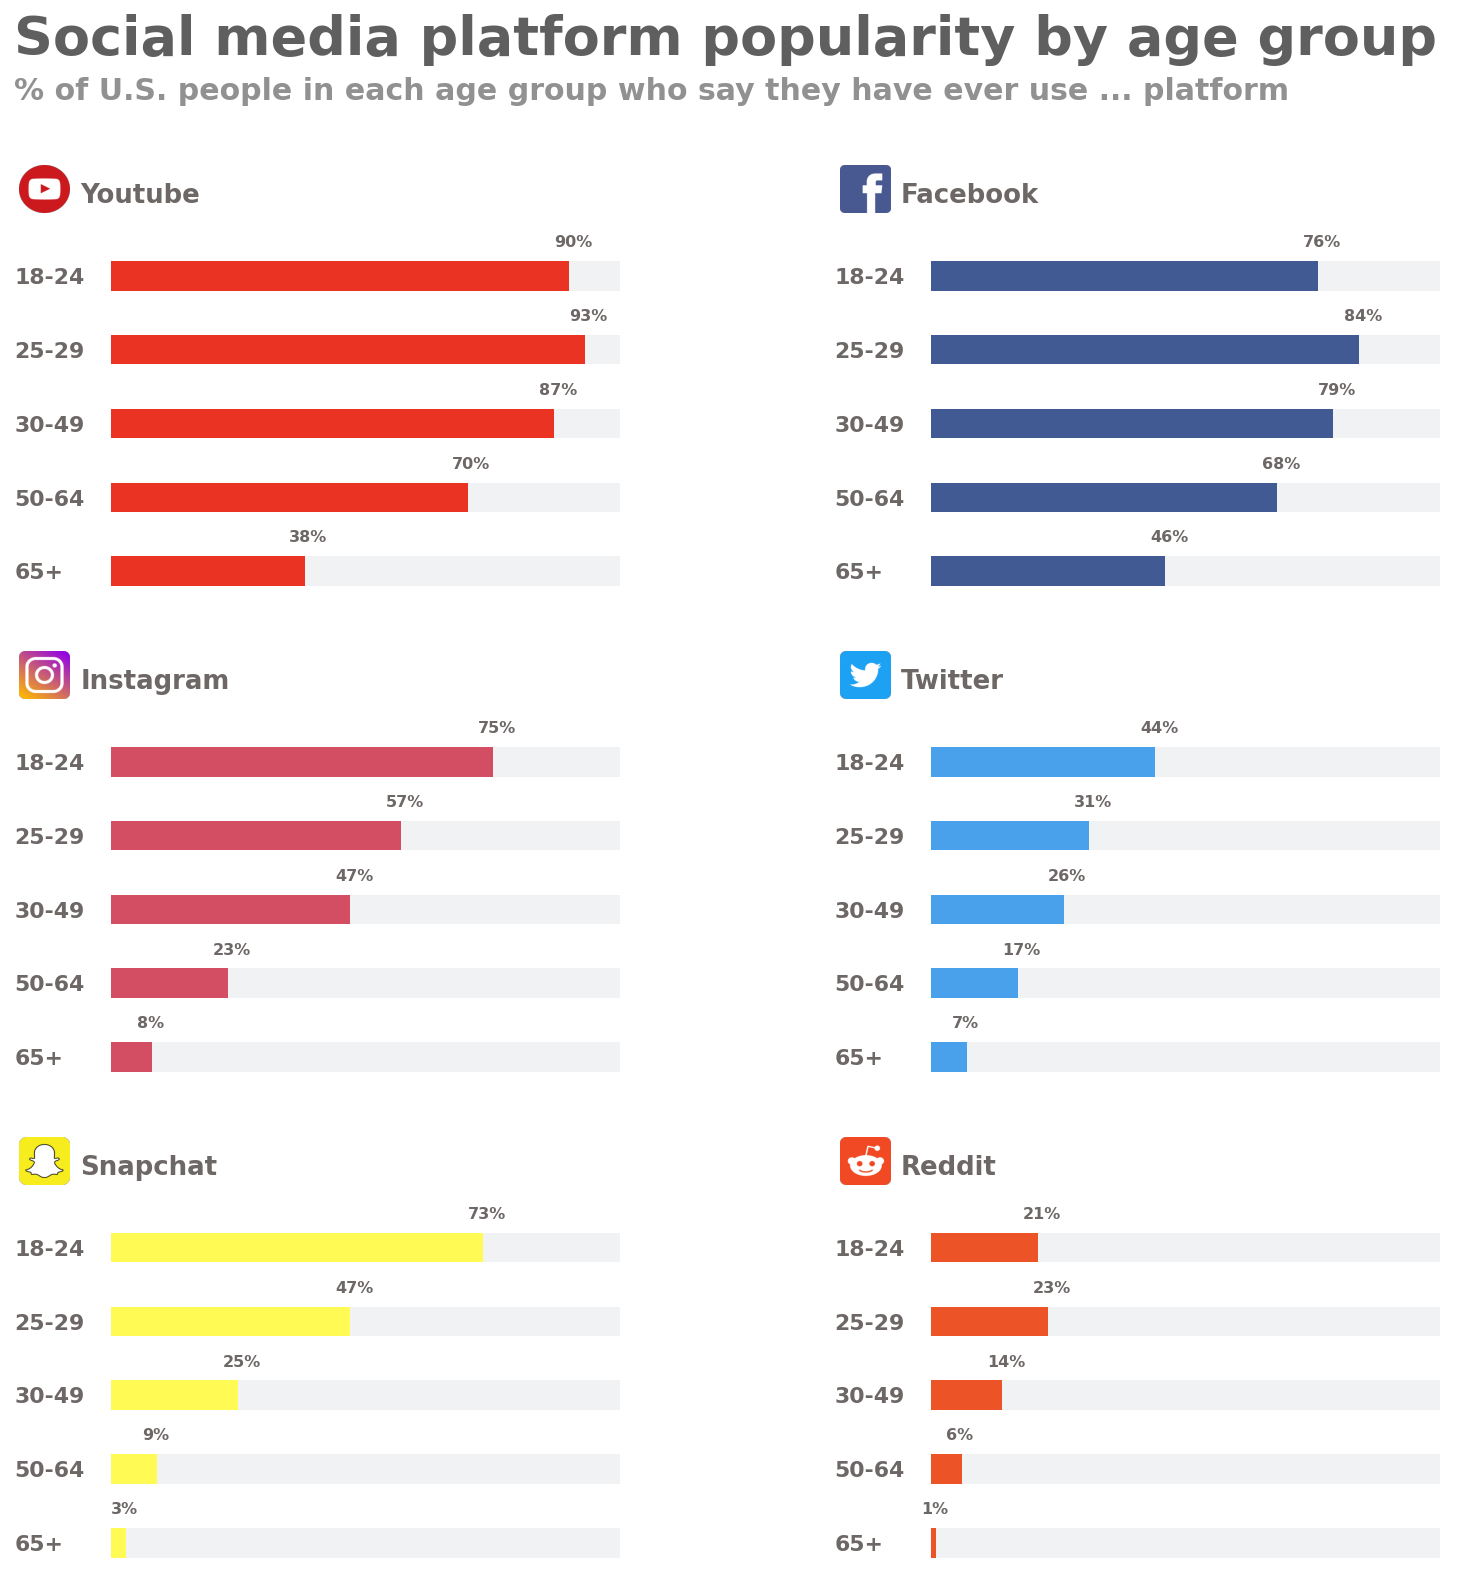

In [102]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(13,13), sharex=True, sharey=False) 
axes = axes.flatten()
plt.subplots_adjust(wspace=0.3, hspace = 0.1)

# Titles 
axes[0].text(-19, 7, 'Social media platform popularity by age group', size =27, color=title_grey, ha='left', weight='bold')
axes[0].text(-19, 6.4, '% of U.S. people in each age group who say they have ever use ... platform', size = 15, color=light_grey2, ha='left', weight='bold')

for i, (app, data_list) in enumerate(data_1.items()):
    if len(im_dict.get(app,'')) > 0:
        axes[i].imshow(im_dict.get(app), aspect='auto', extent=(-18, -8, 4.85, 5.5)) #(left,right,bottom,top)
    axes[i].spines["right"].set_visible(False)
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["left"].set_visible(False)
    axes[i].spines["bottom"].set_visible(False)
    axes[i].tick_params(axis='y', labelsize=12, labelcolor=dark_grey)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
    axes[i].get_yaxis().set_ticks_position('none')
    axes[i].text(x=-6,y=5, s=app, ha='left', color=text_grey, fontsize=13, weight='bold', clip_on=False)
    color = color_dict[app]
    for j, (group, data) in enumerate(zip(age_group[::-1], data_list[::-1])):
        axes[i].barh(group,100,color=light_grey, height=0.4)
        axes[i].barh(group, data, color=color, height=0.4)
        axes[i].text(x=data-3, y=j+0.4, s=f'{data}%', color=text_grey,ha='left', fontsize=8, weight='bold', clip_on=False)
        axes[i].text(x=-19, y=j-0.1, s=f'{group}', color=text_grey,ha='left', fontsize=11, weight='bold', clip_on=False)

plt.show()    

# 

# Visualization 2
### **Story:** Compare what we see in news about death to the actual causes of death
### **Original visualization:**
![viz4](data/viz2.png)

### Changes made:
1. Convert from stacked barchart to two-sided comparison of news vs reality horizontal barchart.  
- The original plot is too cluttered.
- It is much easier to identify the comparison of each cause of death.  
2. Use the same color on the chart and its annotation.
- Using the similarity prinple to improve visual aid. 
3. Add supporting line for "Overrepresented" and "Underrepresented" group
- Using the closure principle to help audience comprehend the information easily.
4. Silent border and axis
- Make visualization clean and effective

In [103]:
# data
df_nyt = pd.read_csv('data/death-coverage-in-nyt.csv')
df_real = pd.read_csv('data/relative-share-of-deaths-in-usa.csv')
# Choose the latest year available
df_nyt_16 = df_nyt[df_nyt['Year']==2016].copy()
df_real_16 = df_real[df_real['Year']==2016].copy()
# join actual cause of death and death coverage in news
df_real_16 = df_real_16.join(df_nyt_16.set_index('Entity'), on='Entity', rsuffix='_')
# drop duplicate 'Year' column
df_real_16 = df_real_16.drop('Year_', axis=1)
df_real_16 = df_real_16.rename(columns={'Share of deaths (Shen et al. 2018)':'share_real',
                                       'Share of NYT media coverage (Shen et al. 2018)':'share_news'})
df_real_16['diff'] = df_real_16['share_news'] - df_real_16['share_real'] 
df_real_16['share_news'] = -1 * df_real_16['share_news']
df_real_16 = df_real_16.sort_values(by='diff', ascending=True)
df_real_16.reset_index(drop=True, inplace=True)
# axis label
xlabel = np.concatenate([np.arange(40,0,-10), np.arange(0,41,10)])
xlabel = [f'{i}%'for i in xlabel]

## **Improved Visulization**

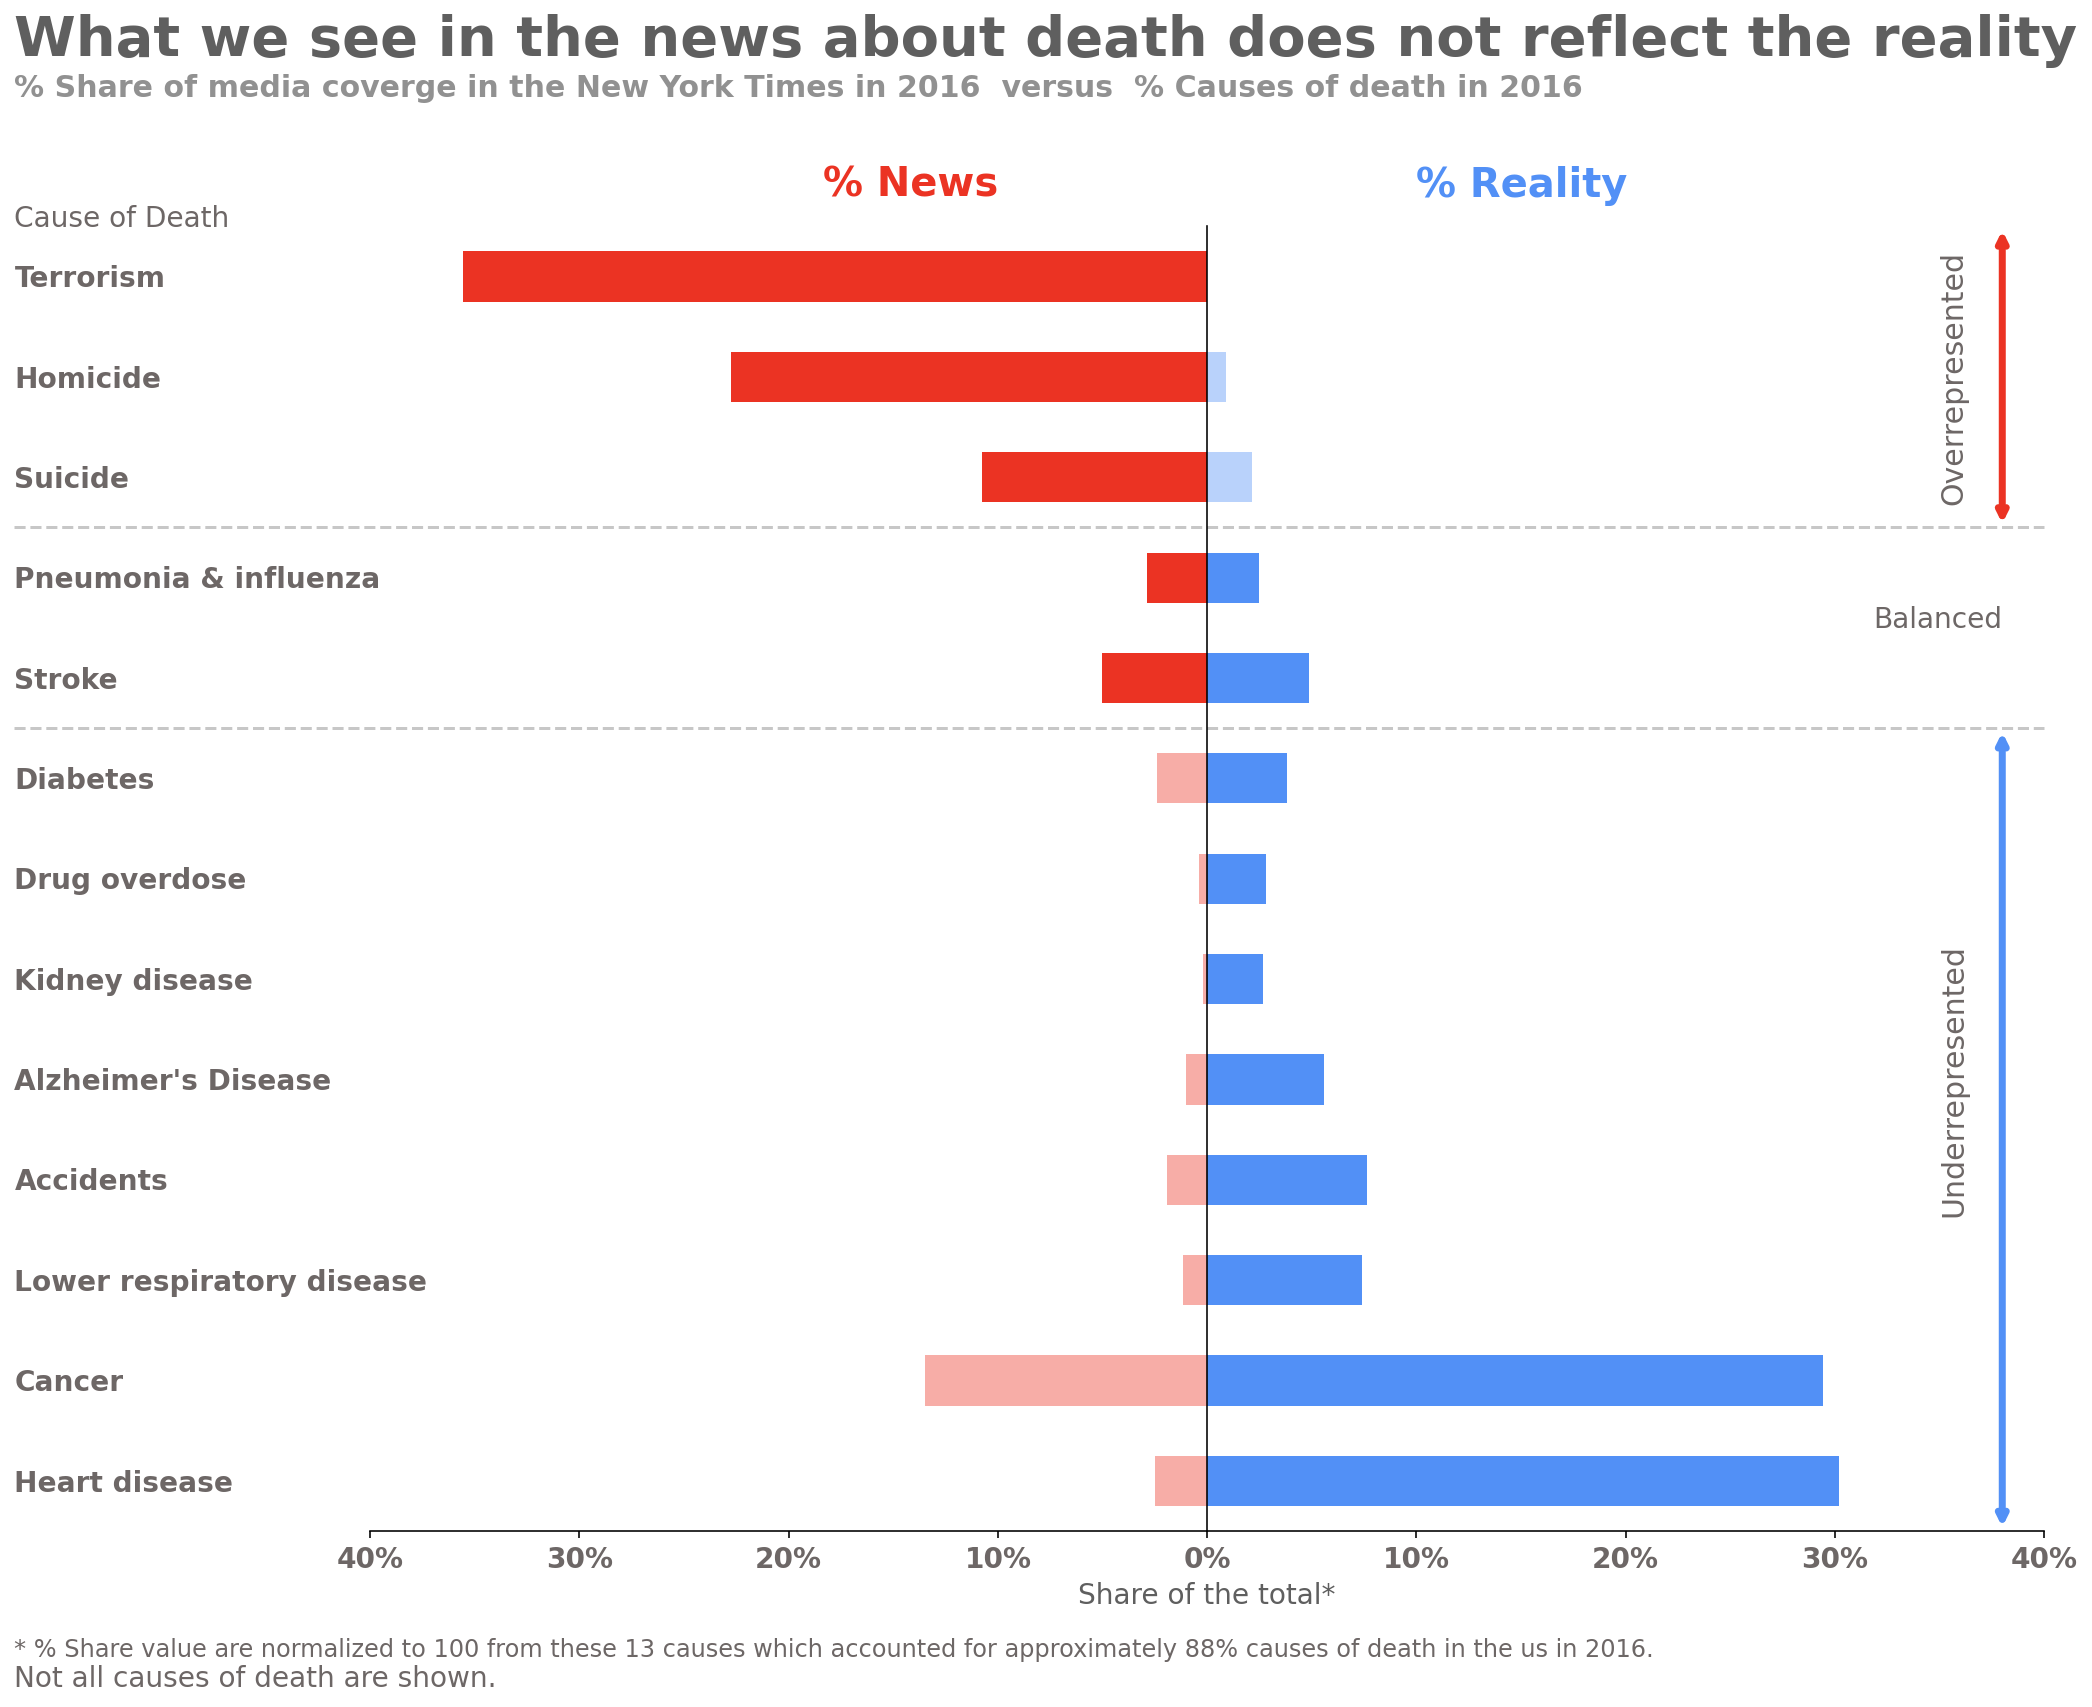

In [115]:
fig, ax = plt.subplots(figsize=(15,12))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines['left'].set_position('center')
ax.get_yaxis().set_visible(False)
ax.set_ylim(top=12.5, bottom=-.5)

#ax.spines["bottom"].set_visible(False)
for i, data in df_real_16.iterrows():
    alpha_real = 1
    alpha_news = 1
    if np.isin(data['Entity'],['Suicide', 'Homicide', 'Terrorism']):
        alpha_real = .4
    if np.isin(data['Entity'], 
                 ['Heart disease', 'Cancer', 'Lower respiratory disease',
                  'Accidents', "Alzheimer's Disease", 'Kidney disease',
                  'Drug overdose', 'Diabetes']):
        alpha_news = .4
    ax.barh(data['Entity'], data['share_real'], color='#5290F6', height=0.5, alpha=alpha_real)
    ax.barh(data['Entity'], data['share_news'], color='#EB3323', height=0.5, alpha=alpha_news)
    # Y-axis label
    ax.text(-57, i-.1, s=data['Entity'], color=text_grey, size=14, ha='left',weight='bold')

# Chart decoration
ax.plot([-57,40], [9.5, 9.5], clip_on=False, linestyle='--',  color=light_grey2, alpha=.5)
ax.plot([-57,40], [7.5, 7.5], clip_on=False, linestyle='--',  color=light_grey2, alpha=.5)
ax.annotate('', xy=(38, 12.5), xycoords='data',
            xytext=(38, 9.5), textcoords='data',
            arrowprops=dict(arrowstyle= '<->', color='#EB3323', lw=3.5, ls='-')
           )
ax.annotate('', xy=(38, 7.5), xycoords='data',
            xytext=(38, -.5), textcoords='data',
            arrowprops=dict(arrowstyle= '<->', color='#5290F6', lw=3.5, ls='-')
           )
# set x-labels
ax.set_xlim(left=-40, right=40)
ax.set_xticklabels(xlabel, size = 14, color=text_grey, weight='semibold')
# Titles 
ax.text(-57, 14.2, 'What we see in the news about death does not reflect the reality', size=28, color=title_grey, ha='left', weight='semibold')
ax.text(-57, 13.8, '% Share of media coverge in the New York Times in 2016  versus  % Causes of death in 2016', size=15, color=light_grey2, ha='left', weight='bold')

# Chart Annotation
ax.text(-57, 12.5, 'Cause of Death', color=text_grey, size=14, ha='left')
ax.text(38, 8.5, 'Balanced', color=text_grey, size=14, ha='right')
ax.text(35, 11, 'Overrepresented', color=text_grey, size=15, va='center', rotation=90)
ax.text(35, 4, 'Underrepresented', color=text_grey, size=15, va='center', rotation=90)
ax.text(-10, 12.8, '% News', color='#EB3323', size=20, ha='right', weight='bold')
ax.text(10, 12.8, '% Reality', color='#5290F6', size=20, ha='left', weight='bold')

# Bottom Text
ax.text(0, -1.225, 'Share of the total*', color=title_grey,size=14, ha='center')
ax.text(-57, -1.75, '* % Share value are normalized to 100 from these 13 causes which accounted for approximately 88% causes of death in the us in 2016.', color=text_grey, size=12, ha='left')
ax.text(-57, -2.05, 'Not all causes of death are shown.', color=text_grey, size=14, ha='left')

plt.show()